In [27]:
# carichiamo le librerie di cui avremo bisogno per interrogare il dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#carichiamo il dataset Covid19.csv:

data=pd.read_csv("covid19_cases.csv")

In [29]:
#verica delle dimensioni del dataset e dei metadati

print(f"Dimensioni del dataset:{data.shape}")
print(f"Metadati del dataset:")
print(data.info())

Dimensioni del dataset:(404433, 67)
Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404433 entries, 0 to 404432
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    404433 non-null  object 
 1   continent                                   385091 non-null  object 
 2   location                                    404433 non-null  object 
 3   date                                        404433 non-null  object 
 4   total_cases                                 365420 non-null  float64
 5   new_cases                                   393220 non-null  float64
 6   new_cases_smoothed                          391990 non-null  float64
 7   total_deaths                                342783 non-null  float64
 8   new_deaths                                  393598 non-null  float64
 9   new_deaths_s

In [30]:
# Filtriamo le righe con valori non nulli nella colonna 'continent'

data_continenti = data[data['continent'].notnull()]

In [31]:
#aggreghiamo i casi totali per continente :
casi_continente=data_continenti.groupby("continent")["total_cases"].sum().reset_index()

In [32]:
print (casi_continente)

       continent   total_cases
0         Africa  1.369675e+10
1           Asia  2.310647e+11
2         Europe  2.190653e+11
3  North America  1.183897e+11
4        Oceania  1.054929e+10
5  South America  6.867891e+10


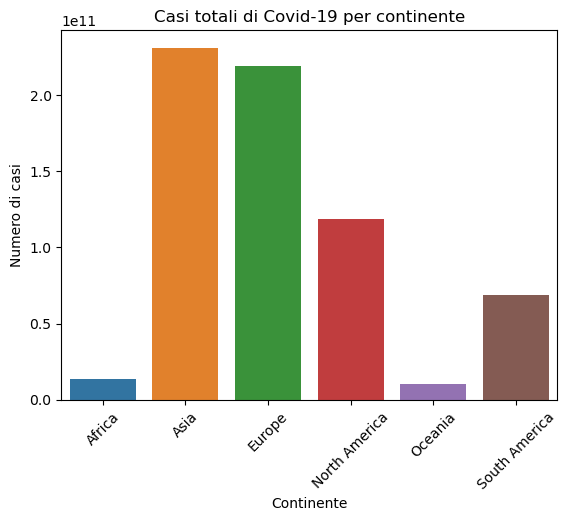

In [33]:
# Anche se non richiesto in questo punto ho preferito visualizzare casi totali per continente, anche per prendere confidenza con lo strumento grafici
sns.barplot(x="continent", y="total_cases", data=casi_continente)
plt.title("Casi totali di Covid-19 per continente")
plt.xlabel("Continente")
plt.ylabel("Numero di casi")
plt.xticks(rotation=45)
plt.show()

In [34]:
#dobbiamo confrontare i dati di due continenti a scelta, con il totale dei casi nel mondo.Per prima cosa ci individuiamo il totale dei casi nel mondo .

casi_totali_mondo = data["total_cases"].sum()

In [35]:
#procediamo con la creazione di due varibiabili, relative ai due continenti che abbiamo scelto di confrontare.(Asia ed Europa) 

continente1="Europe"
continente2="Asia"

In [36]:
#adesso andiamo a calcolare il totale dei casi per i due continenti, considerando nel conteggio anche le locazioni che non hanno indicato il continente.

casi_continente1 = data[data["continent" or"location"] == continente1]
casi_continente2 = data[data["continent"or"location"] == continente2]


In [37]:
# calcoliamo i descrittori statistici per i casi totali dei due continenti, separando il massimo, la media e la percentuale

max_casi_continente1 = casi_continente1["total_cases"].max()
max_casi_continente2 = casi_continente2["total_cases"].max()

media_casi_continente1 = casi_continente1["total_cases"].mean()
media_casi_continente2 = casi_continente2["total_cases"].mean()

percentuale_casi_continente1 = (casi_continente1["total_cases"].sum() / casi_totali_mondo) * 100
percentuale_casi_continente2 = (casi_continente2["total_cases"].sum() / casi_totali_mondo) * 100

In [38]:
# printiamo i risultati

print(f"Valore massimo per {continente1}: {max_casi_continente1}")
print(f"Valore massimo per {continente2}: {max_casi_continente2}")

print(f"Media per {continente1}: {media_casi_continente1:.2f}")
print(f"Media per {continente2}: {media_casi_continente2:.2f}")

print(f"Percentuale rispetto al mondo per {continente1}: {percentuale_casi_continente1:.2f}%")
print(f"Percentuale rispetto al mondo per {continente2}: {percentuale_casi_continente2:.2f}%")

Valore massimo per Europe: 38997490.0
Valore massimo per Asia: 99359003.0
Media per Europe: 2772346.86
Media per Asia: 3342901.75
Percentuale rispetto al mondo per Europe: 7.82%
Percentuale rispetto al mondo per Asia: 8.24%


In [39]:
# Filtriamo  i dati relativi all'Italia nel 2022

data_italia_2022 = data[(data["location"] == "Italy") & (data["date"].str.startswith("2022"))]

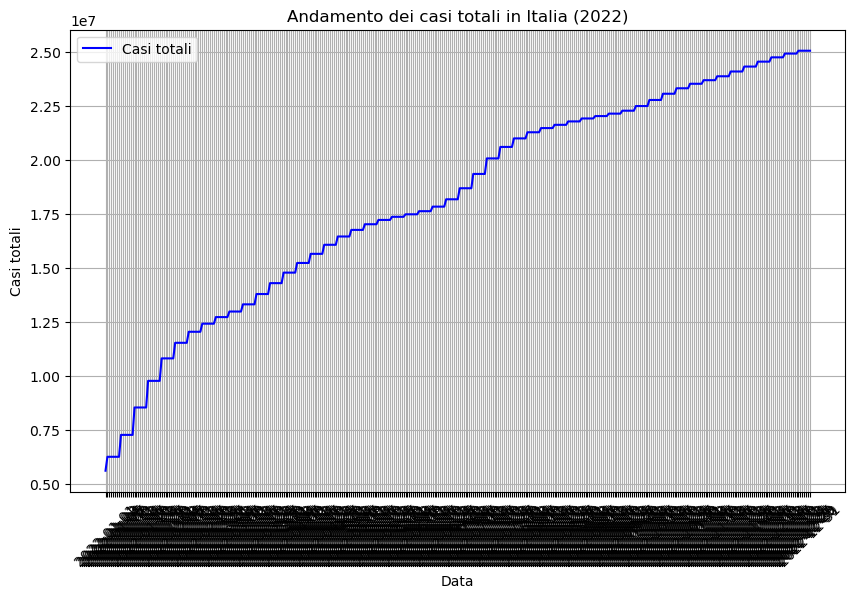

In [40]:
# Creazione del grafico per i casi totali in Italia

plt.figure(figsize=(10, 6))
plt.plot(data_italia_2022["date"], data_italia_2022["total_cases"], label="Casi totali", color="blue")
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.title("Andamento dei casi totali in Italia (2022)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

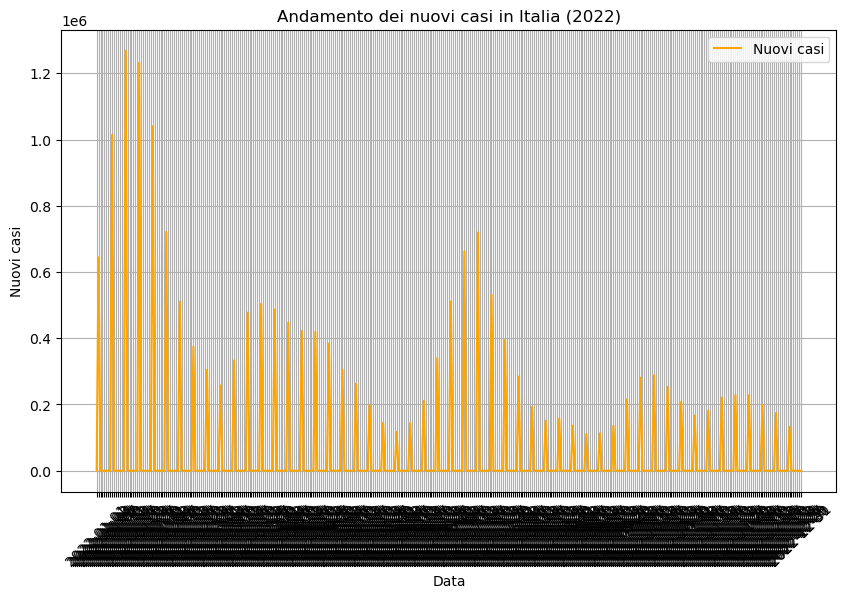

In [41]:
# Creazione del grafico per i nuovi casi

plt.figure(figsize=(10, 6))
plt.plot(data_italia_2022["date"], data_italia_2022["new_cases"], label="Nuovi casi", color="orange")
plt.xlabel("Data")
plt.ylabel("Nuovi casi")
plt.title("Andamento dei nuovi casi in Italia (2022)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Commento sull'andamento in Italia
# L'andamento dei nuovi casi cumulativi presenta un trend simile a quello dei casi totali, 
# mostrando una crescita costante con alcune fluttuazioni. 
# Tuttavia, il grafico dei nuovi casi cumulativi evidenzia meglio l'accelerazione 
# del contagio nel corso dell'anno, soprattutto nel periodo autunnale.

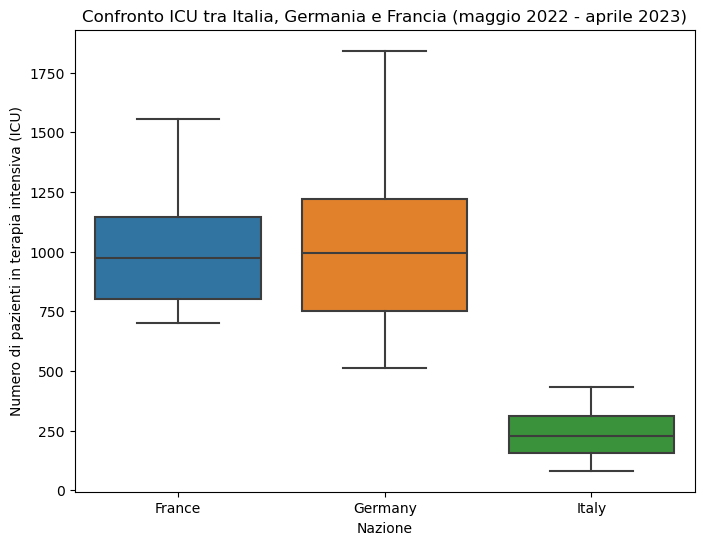

In [42]:
# Confronto tra Italia, Germania e Francia per i pazienti in terapia intensiva (ICU)

location = ["Italy", "Germany", "France"]
icu_data = data[(data["location"].isin(location)) & (data["date"] >= "2022-05-01") & (data["date"] <= "2023-04-30")]
plt.figure(figsize=(8, 6))
sns.boxplot(x="location", y="icu_patients", data=icu_data)
plt.xlabel("Nazione")
plt.ylabel("Numero di pazienti in terapia intensiva (ICU)")
plt.title("Confronto ICU tra Italia, Germania e Francia (maggio 2022 - aprile 2023)")
plt.show()

In [ ]:
 Commento
# Il boxplot mostra che l'Italia ha avuto la maggiore differenza media di pazienti in terapia intensiva 
# nel periodo considerato, seguita dalla Francia e dalla Germania. 
# Si osserva una variabilità maggiore per l'Italia e la Francia rispetto alla Germania. 
# È importante sottolineare che questi dati si riferiscono al periodo specificato e 
# potrebbero non riflettere la situazione attuale o le tendenze a lungo termine.

In [43]:
# Filtra i dati per le nazioni specificate

nazioni_selezionate = ["Italy", "France", "Germany", "Spain"]
dati_nazioni = data[(data["location"].isin(nazioni_selezionate)) & (data["date"].str.startswith("2023"))]

In [44]:
# Calcola la somma dei pazienti ospedalizzati per ciascuna nazione:

somma_pazienti_ospedalizzati = dati_nazioni.groupby("location")["hosp_patients"].sum()

In [45]:
# Gestione dei dati nulli , sostituiti con "-"

media_pazienti_ospedalizzati = somma_pazienti_ospedalizzati.mean()
somma_pazienti_ospedalizzati.fillna("-")

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64